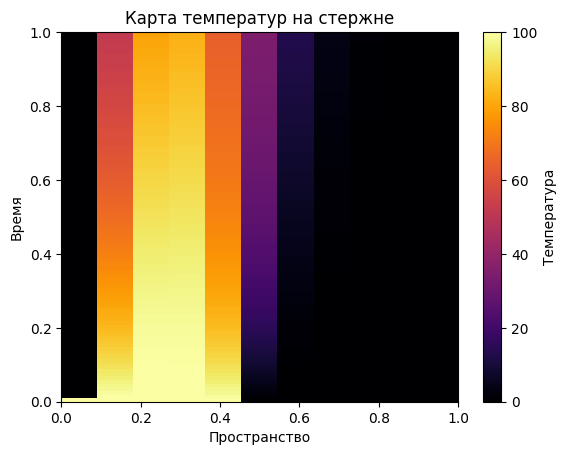

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Определение параметров задачи
L = 1.0          # Длина стержня
T = 1.0          # Время расчета
kappa = 0.01     # Коэффициент теплопроводности
Nx = 10          # Количество точек по пространству
Nt = 100         # Количество временных шагов
dx = L / Nx      # Шаг по пространству
dt = T / Nt      # Шаг по времени

# Инициализация сетки
x_values = np.linspace(0, L, Nx+1)
u_values = np.zeros((Nt+1, Nx+1))

# Начальное условие
u_values[0, :Nx//2] = 100.0

# Явная схема метода точечной коллокации для уравнения теплопроводности
for t in range(0, Nt):
    for i in range(1, Nx):
        u_values[t+1, i] = u_values[t, i] + kappa * dt / dx**2 * (u_values[t, i-1] - 2*u_values[t, i] + u_values[t, i+1])

# Построение карты температур
plt.imshow(u_values, aspect="auto", cmap="inferno", origin="lower", extent=[0, L, 0, T])
plt.colorbar(label="Температура")
plt.title('Карта температур на стержне')
plt.xlabel('Пространство')
plt.ylabel('Время')
plt.show()


[1.0, 0.99004983375, 0.9801986733084026, 0.9704455335509545, 0.9607894391555526, 0.9512294245047106, 0.9417645335889969, 0.9323938199114327, 0.9231163463928413, 0.91393118527814, 0.904837418043563, 0.8958341353048088, 0.886920436726101, 0.8780954309301536, 0.8693582354090332, 0.8607079764359067, 0.8521437889776683, 0.8436648166084356, 0.8352702114239059, 0.8269591339565654, 0.8187307530917416, 0.8105842459844911, 0.8025187979773145, 0.7945336025186901, 0.7866278610824177, 0.7788007830877657, 0.7710515858204122, 0.763379494354173, 0.755783741473508, 0.7482635675967996, 0.7408182207003933, 0.7334469562433952, 0.7261490370932169, 0.718923733451862, 0.7117703227829453, 0.7046880897394389, 0.6976763260921365, 0.6907343306588305, 0.6838614092341927, 0.6770568745203532, 0.6703200460581703, 0.6636502501591839, 0.6570468198382459, 0.6505090947468215, 0.6440364211069536, 0.6376281516458844, 0.6312836455313277, 0.6250022683073849, 0.6187833918310993, 0.6126263942096409, 0.6065306597381169, 0.6004

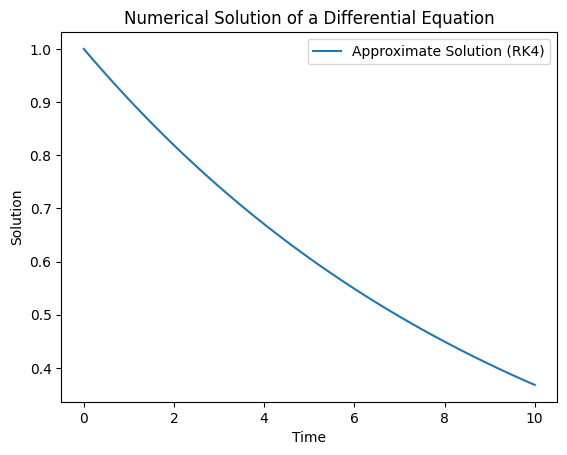

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Функция, описывающая дифференциальное уравнение
def differential_equation(t, u):
    return -0.1 * u

# Метод Рунге-Кутты четвертого порядка
def runge_kutta_method(initial_value, time_points, step_size):
    result = [initial_value]

    for i in range(1, len(time_points)):
        t = time_points[i - 1]
        u = result[i - 1]

        k1 = step_size * differential_equation(t, u)
        k2 = step_size * differential_equation(t + 0.5 * step_size, u + 0.5 * k1)
        k3 = step_size * differential_equation(t + 0.5 * step_size, u + 0.5 * k2)
        k4 = step_size * differential_equation(t + step_size, u + k3)

        u_next = u + (k1 + 2*k2 + 2*k3 + k4) / 6.0
        result.append(u_next)

    return result

# Параметры задачи
initial_value = 1.0
start_time = 0.0
end_time = 10.0
step_size = 0.1

# Генерация временных точек
time_points = np.arange(start_time, end_time + step_size, step_size)

# Вычисление приближённого решения с использованием метода Рунге-Кутты
approximate_solution = runge_kutta_method(initial_value, time_points, step_size)
# Отображение результатов
plt.plot(time_points, approximate_solution, label='Approximate Solution (RK4)')
plt.title('Numerical Solution of a Differential Equation')
plt.xlabel('Time')
plt.ylabel('Solution')
plt.legend()
plt.show()
